In [8]:
#Union
example_set_1 = {1,2,3}
example_set_2 = {'a','b','c'}
#Method 1
example_union_1 = example_set_1.union(example_set_2)
print('Printing union set using method 1 :', example_union_1)
# Method 2:
example_union_2 = example_set_1|example_set_2
print('Printing union set using method 2 :', example_union_2)

Printing union set using method 1 : {1, 2, 3, 'a', 'b', 'c'}
Printing union set using method 2 : {1, 2, 3, 'a', 'b', 'c'}


In [9]:
#Intersection
example_set_1 = {1,2,3}
example_set_2 = {3,'b','c'}
#Method 1
example_intersection_1 = example_set_1.intersection(example_set_2)
print('Printing intersection set using method 1 :', example_intersection_1)
# Method 2:
example_intersection_2 = example_set_1 & example_set_2
print('Printing intersection set using method 2 :', example_intersection_2)

Printing intersection set using method 1 : {3}
Printing intersection set using method 2 : {3}


In [10]:
# Set Difference
#Intersection
example_set_1 = {1,2,3}
example_set_2 = {3,'b','c'}
#Method 1
example_diff_1 = example_set_1.difference(example_set_2)
print('Printing set difference using method 1 :', example_diff_1)
# Method 2:
example_diff_2 = example_set_1 - example_set_2
print('Printing set difference using method 2 :', example_diff_2)

Printing set difference using method 1 : {1, 2}
Printing set difference using method 2 : {1, 2}


In [11]:
import numpy as np

In [12]:
#Define a function to simulate coin tosses
def coin_toss():
    if np.random.random()>= 0.5:
        return 'H'
    else:
        return 'T'

In [13]:
# Simulate the coin toss and store the outcomes in a dictionary
num_tosses = 10
toss_results = {}
for i in range(num_tosses):
    toss_results[i] = coin_toss()
toss_results   

{0: 'T',
 1: 'T',
 2: 'H',
 3: 'H',
 4: 'H',
 5: 'H',
 6: 'T',
 7: 'T',
 8: 'H',
 9: 'T'}

In [14]:
# Count the number of heads and tails
print('Heads : ', sum([x=='H' for x in toss_results.values()]))
print('Tails : ', sum([x=='T' for x in toss_results.values()]))

Heads :  5
Tails :  5


In [15]:
# If toss many times, what fraction of times will we get heads?
toss_results_list = [coin_toss() for x in range(10000)]

print('Heads : ', sum([x=='H' for x in toss_results_list]))
print('Tails : ', sum([x=='T' for x in toss_results_list]))

Heads :  5014
Tails :  4986


In [16]:
def die_roll():
    sample_space = [1,2,3,4,5,6]
    proba = [1/len(sample_space) for x in range(len(sample_space))] # All throws are equally likely
    return np.random.choice(sample_space, p=proba)

In [17]:
die_roll()

5

In [18]:
from collections import Counter
dict(Counter([die_roll() for x in range(1000)]))

{2: 161, 6: 147, 3: 183, 5: 182, 1: 160, 4: 167}

Event space

In [ ]:
pip install matplotlib

In [22]:
import matplotlib.pyplot as plt

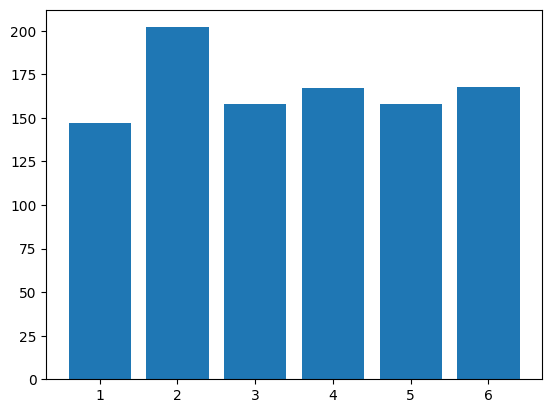

In [23]:
# If a die is thrown many times, let's plot the number of times each face appear
number_throws = 1000
die_throw = Counter([die_roll() for x in range(number_throws)])
plt.bar(x = die_throw.keys(), height = die_throw.values())
plt.show()

In [24]:
# Lets sum the faces from two dice rolled many times
number_throws = 1000
die_sum = {k:v for k,v in sorted(Counter([die_roll()+die_roll() for x in range(number_throws)]).items(), key = lambda item: item[0])}
print(die_sum)

{2: 36, 3: 56, 4: 79, 5: 102, 6: 132, 7: 173, 8: 129, 9: 111, 10: 101, 11: 53, 12: 28}


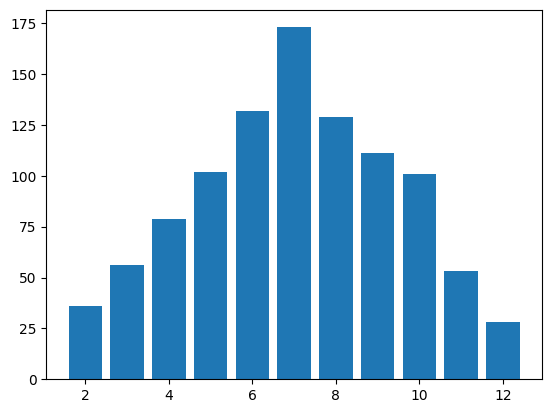

In [25]:
# Let's plot the values of the sum
plt.bar(x = die_sum.keys(), height = die_sum.values())
plt.show()

What is the probability of winning a lottery where there are 100 tickets issued and bought? Why is the probability not half?

In [26]:
# Lets write a function to pick a winning ticket number
def lottery(number_of_tickets):
    tickets = [x for x in range(1,number_of_tickets+1)] # Suppose tickets are numbered from 1 to N
    proba = [1/len(tickets) for x in range(len(tickets))]
    return np.random.choice(tickets, p=proba)

In [27]:
# If there are 100 tickets, and you have bought ticket number 5, what is the probability of your win?

# Let us run the lottery many times
number_of_times = 10000
winning_numbers = [lottery(100) for x in range(number_of_times)]

# Let us check how many times 5 was the winning number
wins = sum([x==5 for x in winning_numbers])

# What can we say about the probability of winning?
wins/number_of_times

0.0088

Question: What is the probability of getting a three or a seven when a fair die is rolled?

In [28]:
rolls = [die_roll() for x in range(100000)]
(rolls.count(7)+rolls.count(3))/len(rolls)

0.16811

Question: What is the probability of getting two heads when a coin is tossed twice?

In [30]:
#Define a function to simulate coin tosses
def coin_toss():
    if np.random.random()>= 0.5:
        return 1
    else:
        return 0

In [31]:
tosses = [coin_toss()*coin_toss() for x in range(10000)]
sum(tosses)/len(tosses)

0.2522

Question: The participants of a course include 7 men and 10 women from India, 5 men and 7 women from the USA. If a participant is picked at random, what is the probability that the participant is Indian or a man?

In [32]:
def participant_selector(m_i,w_i,m_u,w_u):
    # Let's create the sample space with man_india, woman_india, man_usa and woman_usa to refer to the participants
    participants = ['india_man']*m_i+['india_woman']*w_i+['usa_man']*m_u+['usa_woman']*w_u
    np.random.shuffle(participants)
    #print(participants)
    proba = [1/len(participants) for x in range(len(participants))]
    return np.random.choice(participants, p=proba)

In [33]:
# Let us run the participant selection many times
number_of_times = 1000
selected_participants = [participant_selector(7,10,5,7) for x in range(number_of_times)]

# Number of participants who are either indian or men = number of indians + number of men - number of indian men

# Number of Indians
n_indians = sum(['india' in x for x in selected_participants])
# Number of men
n_men = sum(['_man' in x for x in selected_participants])
# Number of men who are indians
n_indian_men = sum(['india_man' in x for x in selected_participants])

n_indian_or_men = n_indians + n_men - n_indian_men

# Probability
n_indian_or_men/len(selected_participants)

0.762

Probability of complements:
    
Question: A bag contains 2 red balls, 3 blue balls and 2 green balls. What is the probability of picking a ball that's not red

In [34]:
def ball_from_bag(red,blue,green):
    # Let's create the sample space
    bag = ['red']*red+['blue']*blue+['green']*green
    np.random.shuffle(bag)
    #print(bag)
    proba = [1/len(bag) for x in range(len(bag))]
    return np.random.choice(bag, p=proba)

In [35]:
# Let us run the selection many times
number_of_times = 10000
selections = [ball_from_bag(2,3,2) for x in range(number_of_times)]

# Number of selections that are not red
not_red = sum([x!='red' for x in selections])

# Probability
not_red/len(selections)

0.7111

Dependent Events and conditional probability and joint probability

1. A bag contains 4 red marbles and 3 blue marbles. You draw a marble from the bag. The marble drawn is blue. You return the marble to the bag and draw another. What is the proability that the second marble drawn is red?

In [36]:
def ball_from_bag(red,blue,green):
    # Let's create the sample space
    bag = ['red']*red+['blue']*blue+['green']*green
    #print(bag)
    np.random.shuffle(bag)
    #print(bag)
    proba = [1/len(bag) for x in range(len(bag))]
    return np.random.choice(bag, p=proba)

In [37]:
# Let us run this experiment multiple times
number_of_times = 100000
# First selection
selections_1 = [ball_from_bag(4,3,0) for x in range(number_of_times)]

# Second selection after returning the first marble
selections_2 = [ball_from_bag(4,3,0) for x in range(number_of_times)]

#Probability of red in second draw
red = sum([x=='red' for x in selections_2]) # Number of reds
red/len(selections_2)

0.57305

2. A bag contains 4 red marbles and 3 blue marbles. You draw a marble from the bag. The marble drawn is blue. You draw another marble. What is the proability that the second marble drawn is red?

In [38]:
def ball_from_bag(red,blue,green):
    # Let's create the sample space
    bag = ['red']*red+['blue']*blue+['green']*green
    #print(bag)
    np.random.shuffle(bag)
    #print(bag)
    proba = [1/len(bag) for x in range(len(bag))]
    return np.random.choice(bag, p=proba)

In [39]:
# Let us run this experiment multiple times
number_of_times = 1000
# First selection
selections_1 = [ball_from_bag(4,3,0) for x in range(number_of_times)]

# Second selecttion. This time we have 1 blue less
selections_2 = [ball_from_bag(4,2,0) for x in range(number_of_times)]

#Probability of red in second draw
red = sum([x=='red' for x in selections_2]) # Number of reds
red/len(selections_2)

0.661

In [40]:
# p(r/b)

(3/7)*(4/6)/(3/7)

0.6666666666666666

3. A bag contains 4 red marbles and 3 blue marbles. You draw two marbles from the bag, one after the other. What is the probability that the second marble is blue?

In [41]:
def ball_from_bag_2(red,blue,green):
    # Let's create the sample space
    bag = ['red']*red+['blue']*blue+['green']*green
    #print(bag)
    np.random.shuffle(bag)
    #print(bag)
    proba = [1/len(bag) for x in range(len(bag))]
    pick1 = np.random.choice(bag, p=proba)
    #print(pick1)
    # Remove pick 1 from bag since we are not returning it, before picking next
    bag = ['red']*(red - 1*(pick1=='red')) + ['blue']*(blue - 1*(pick1=='blue')) + ['green']*(green - 1*(pick1=='green'))
    #print(bag)
    proba = [1/len(bag) for x in range(len(bag))]
    pick2 = np.random.choice(bag, p=proba)
    return [pick1, pick2]

In [42]:
# Let us run this experiment multiple times
number_of_times = 1000
selections_1 = [ball_from_bag_2(4,3,0) for x in range(number_of_times)]
#print(selections_1)
second_blue = [x for x in selections_1 if x[1]=='blue'] # Finds cases where the second one is blue
#print(second_blue)
len(second_blue)/len(selections_1)

0.401

In [43]:
(4/7)*(3/6) + (3/7)*(2/6)

0.42857142857142855

Bayes Theorem

Question: A bag contains 4 red marbles and 3 blue marbles. You draw two marble from the bag, one by one. The second marble drawn is blue. What is the probability that the first marble drawn was red?

In [44]:
first_red = [x for x in second_blue if x[0]=='red']
len(first_red)/len(second_blue)

0.6658354114713217

In [45]:
(4/7)*(3/6)/((4/7)*(3/6) + (3/7)*(2/6))

0.6666666666666666

Question: 
Given the following points, What is the probability that X has a disease D if X has a positive test result?

1. One percent of X have D.
2. Ninety percent of X who have D test positive.
3. Eight percent of X will have false positives.

In [46]:
0.9*0.01/(0.9*0.01 + 0.08*0.99)

0.10204081632653063

In [ ]:
def disease_given_test(n,p,tp_given_d,fp):
    print('Population : ', n)
    cases = [np.random.random()<=p for x in range(n)]
    #print(cases)
    number_cases = sum(cases)
    print('Number of cases : ',number_cases)
    correct_test_positive = [np.random.random()<=tp_given_d for x in range(number_cases)]
    #print(correct_test_positive)
    number_correct_positives = sum(correct_test_positive)
    print('Number of correct test positives : ',number_correct_positives)
    incorrect_test_positive = [np.random.random()<fp for x in range(n-number_cases)]
    #print(incorrect_test_positive)
    number_incorrect_positive = sum(incorrect_test_positive)
    print('Number of incorrect test positives : ',number_incorrect_positive)
    total_positive = number_correct_positives+number_incorrect_positive
    print('Total positives : ',total_positive)
    print('Probability of disease given test says positive : ',number_correct_positives/total_positive)
    print('-'*50)
    return number_correct_positives/total_positive

In [ ]:
disease_given_test(10000,0.01,0.9,0.08)

In [ ]:
#Let us run this multiple times
n_times = 1000
p_disease_given_test_positive = [disease_given_test(1000,0.01,0.9,0.08) for x in range(n_times)]

In [ ]:
np.mean(p_disease_given_test_positive)

In [ ]:
# Why closed form solutions matter?
# Why we need simulations if closed form solutions aren't possible?

# If we roll three dice, what is the probability that their total is 8?

# We could count all the possibilities, or we could get an approximate answer via simulation.

# importing numpy
import numpy as np
import random
np.random.seed(1234)

def roll_dice(num_dice):
    """Return a list of integers with length `num_dice`.

    Each integer in the returned list is a random number between
    1 and 6, inclusive.
    """
    roll_results = []
    for i in range(num_dice):
        roll = random.randint(1, 6)
        roll_results.append(roll)
    return roll_results

def sum_simulation(num_dice, k, nreps):
    sums = np.zeros(nreps)
    for rep in range(nreps): 
     sums[rep]=sum(roll_dice(num_dice))
    return np.count_nonzero(sums == k)/nreps



In [ ]:
simulation_result=sum_simulation(2, 7, 10) #10 repetitions
print(simulation_result)

simulation_result=sum_simulation(2, 7, 100) #100 repetitions
print(simulation_result)

simulation_result=sum_simulation(2, 7, 100) #1000 repetitions
print(simulation_result)

simulation_result=sum_simulation(2, 7, 100000) #100,000 repetitions
print(simulation_result)
